In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
from matplotlib.animation import FuncAnimation
import os
from path import Path
import pickle
plt.rcParams["font.family"] = "serif"
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14) 

In [4]:
# First run the test.py to create the results pickle file for analysis
architectures = ['vit', 'cnn']
include_state = True
train_type = 'random'
save_dir = Path('results')

In [5]:
# Load the data file or files
results = {}
for arch in architectures:
    filename = save_dir/'{}_{}_{}.pkl'.format(arch, "state" if include_state else "visu", train_type)
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    results[arch] = data


In [ ]:
# Cell to plot the force estimation for both the cnn and the vit to compare with the ground truth
x = (1/30)*np.linspace(0, 580, len(results['vit']['shared_gt']))
my_dpi = 100

fig, ax = plt.subplots(ncols=1, nrows=3, sharex=False, sharey = False, figsize=(1920/my_dpi, 1080/my_dpi), dpi=my_dpi)
fig.suptitle("Force estimation for {} train set".format(train_type), fontsize=24, fontweight='bold')
ax[0].plot(x, results['vit']['shared_gt'][:, 0], 'b', linewidth=3.0)
ax[0].plot(x, results['vit']['shared_pred'][:, 0], 'r', linewidth=3.0)
ax[0].plot(x, results['cnn']['shared_pred'][:, 0], 'g', linewidth=3.0)
ax[0].legend(["Ground truth", "ViST" if include_state else "ViT", "VSCNN" if include_state else "VCNN"], fontsize=14)
ax[0].set_ylabel("Force X (N)", fontsize=16, fontweight='bold')
ax[1].plot(x, results['vit']['shared_gt'][:, 1], 'b', linewidth=3.0)
ax[1].plot(x, results['vit']['shared_pred'][:, 1], 'r', linewidth=3.0)
ax[1].plot(x, results['cnn']['shared_pred'][:, 1], 'g', linewidth=3.0)
ax[1].set_ylabel("Force Y (N)", fontsize=16, fontweight='bold')
ax[2].plot(x, results['vit']['shared_gt'][:, 2], 'b', linewidth=3.0)
ax[2].plot(x, results['vit']['shared_pred'][:, 2], 'r', linewidth=3.0)
ax[2].plot(x, results['cnn']['shared_pred'][:, 2], 'g', linewidth=3.0)
ax[2].set_ylabel("Force Z (N)", fontsize=16, fontweight='bold')
ax[2].set_xlabel("Time (s)", fontsize=16, fontweight='bold')
fig.align_labels()

fig.savefig('figures/shared/predictions_{}.png'.format(train_type), dpi=my_dpi)

In [ ]:
# Cell to plot the force estimation for both the cnn and the vit to compare with the ground truth
x = (1/30)*np.linspace(0, 580, len(results['vit']['test_gt']))

fig, ax = plt.subplots(ncols=1, nrows=3, sharex=False, sharey = False, figsize=(1920/my_dpi, 1080/my_dpi), dpi=my_dpi)
fig.suptitle("Force estimation for {} shift".format(train_type), fontsize=24, fontweight='bold')
ax[0].plot(x, results['vit']['test_gt'][:, 0], 'b', linewidth=3.0)
ax[0].plot(x, results['vit']['test_pred'][:, 0], 'r', linewidth=3.0)
ax[0].plot(x, results['cnn']['test_pred'][:, 0], 'g', linewidth=3.0)
ax[0].legend(["Ground truth", "ViST" if include_state else "ViT", "VSCNN" if include_state else "VCNN"], fontsize=14, loc='lower left')
ax[0].set_ylabel("Force X (N)", fontsize=16, fontweight='bold')
ax[1].plot(x, results['vit']['test_gt'][:, 1], 'b', linewidth=3.0)
ax[1].plot(x, results['vit']['test_pred'][:, 1], 'r', linewidth=3.0)
ax[1].plot(x, results['cnn']['test_pred'][:, 1], 'g', linewidth=3.0)
ax[1].set_ylabel("Force Y (N)", fontsize=16, fontweight='bold')
ax[2].plot(x, results['vit']['test_gt'][:, 2], 'b', linewidth=3.0)
ax[2].plot(x, results['vit']['test_pred'][:, 2], 'r', linewidth=3.0)
ax[2].plot(x, results['cnn']['test_pred'][:, 2], 'g', linewidth=3.0)
ax[2].set_ylabel("Force Z (N)", fontsize=16, fontweight='bold')
ax[2].set_xlabel("Time (s)", fontsize=16, fontweight='bold')
fig.align_labels()

fig.savefig('figures/test/predictions_{}.png'.format(train_type), dpi=my_dpi)

In [ ]:
experiments = ["color", "geometry", "random", "stiffness", "structure"]
for exp in experiments:
    for arch in architectures:
        filename = save_dir/'{}_{}_{}.pkl'.format(arch, "state" if include_state else "visu", exp)
        with open(filename, 'rb') as f:
            data = pickle.load(f)
        print("{} | {} | RMSE -- Common env. mean={}, std={} -- Unseen env. mean={}, std={}".format(arch, exp, data['shared_rmse'].mean(), data['shared_rmse'].std(), data['test_rmse'].mean(), data['test_rmse'].std()))

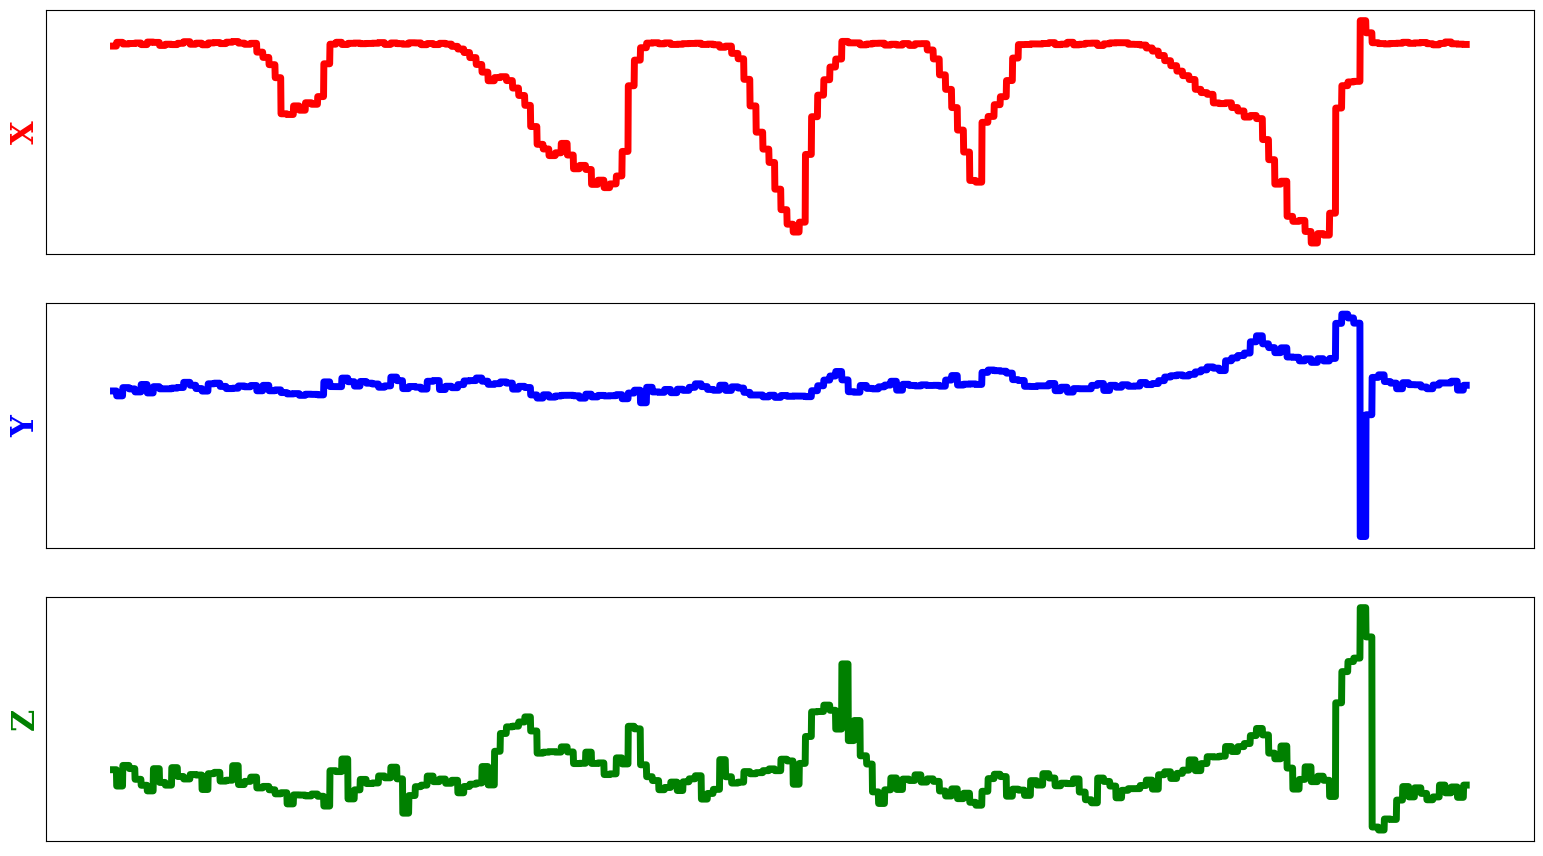

In [51]:
# Cell to plot the force estimation for both the cnn and the vit to compare with the ground truth
x = (1/30)*np.linspace(0, 580, len(results['vit']['shared_gt']))
my_dpi = 100

fig, ax = plt.subplots(ncols=1, nrows=3, sharex=False, sharey = False, figsize=(1920/my_dpi, 1080/my_dpi), dpi=my_dpi)
ax[0].plot(x, results['vit']['shared_gt'][:, 0], 'r', linewidth=5.0)
ax[0].set_ylabel("X", fontsize=22, fontweight='bold', loc='center', labelpad=0)
ax[0].yaxis.label.set_color('red')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].plot(x, results['vit']['shared_gt'][:, 1], 'b', linewidth=5.0)
ax[1].set_ylabel("Y", fontsize=22, fontweight='bold', loc='center', labelpad=0)
ax[1].yaxis.label.set_color('blue')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].plot(x, results['vit']['shared_gt'][:, 2], 'g', linewidth=5.0)
ax[2].set_ylabel("Z", fontsize=22, fontweight='bold', labelpad=0)
ax[2].yaxis.label.set_color('green')
ax[2].set_xticks([])
ax[2].set_yticks([])
fig.align_labels()

fig.savefig('figures/force_gt.png'.format(train_type), dpi=my_dpi)

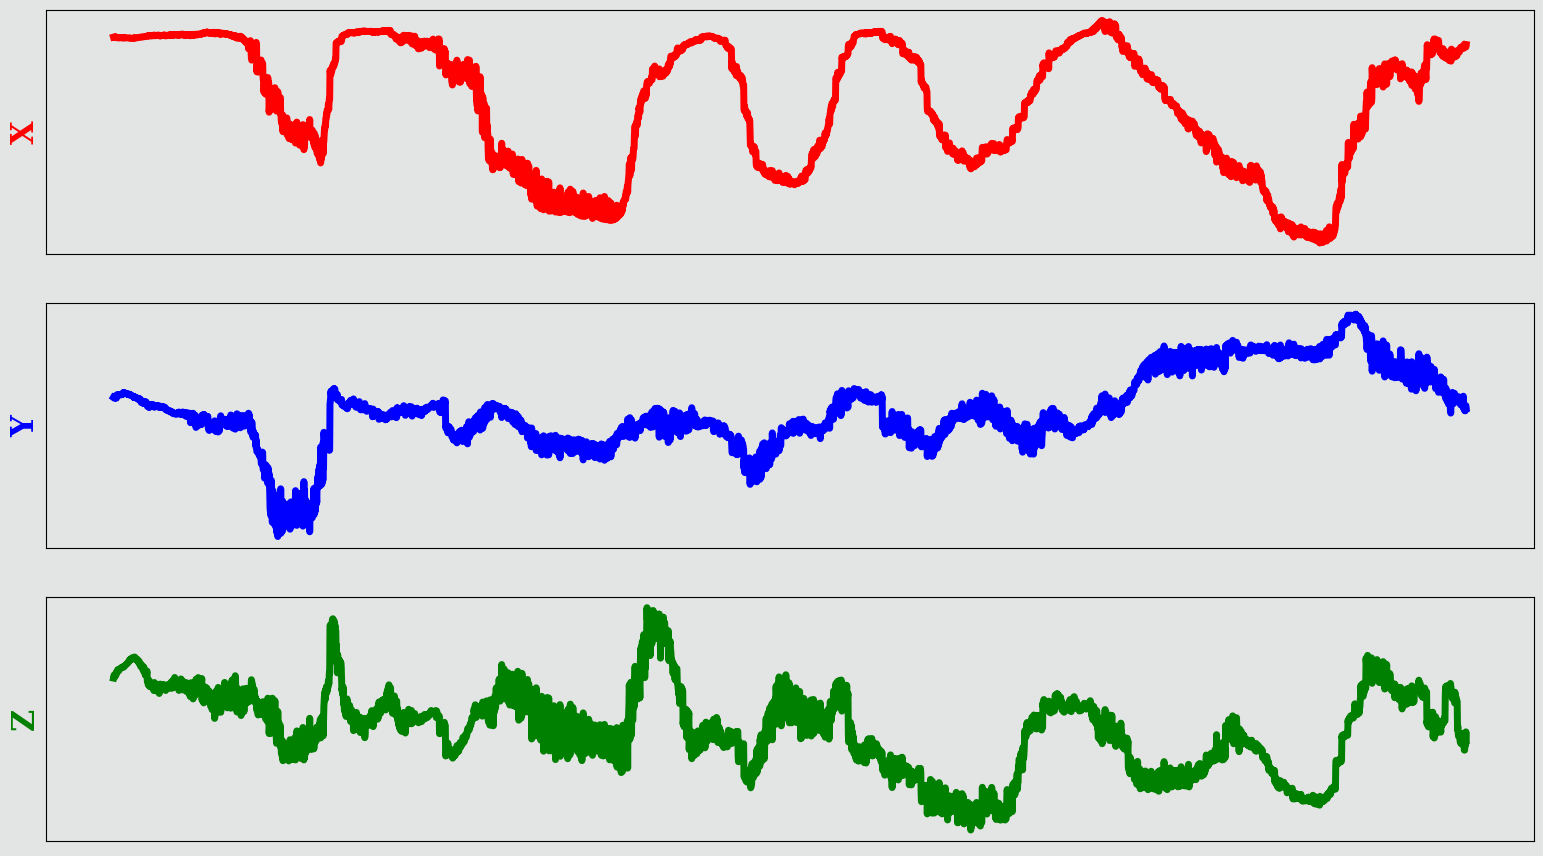

In [53]:
x = (1/30)*np.linspace(0, 580, len(results['vit']['shared_gt']))
my_dpi = 100

fig, ax = plt.subplots(ncols=1, nrows=3, sharex=False, sharey = False, figsize=(1920/my_dpi, 1080/my_dpi), dpi=my_dpi)
ax[0].plot(x, results['vit']['shared_pred'][:, 0], 'r', linewidth=5.0)
ax[0].set_ylabel("X", fontsize=22, fontweight='bold', loc='center', labelpad=0)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].yaxis.label.set_color('red')
ax[0].set_facecolor('#E3E4E4')
ax[1].plot(x, results['vit']['shared_pred'][:, 1], 'b', linewidth=5.0)
ax[1].set_ylabel("Y", fontsize=22, fontweight='bold', loc='center', labelpad=0)
ax[1].yaxis.label.set_color('blue')
ax[1].set_facecolor('#E3E4E4')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].plot(x, results['vit']['shared_pred'][:, 2], 'g', linewidth=5.0)
ax[2].set_ylabel("Z", fontsize=22, fontweight='bold', labelpad=0)
ax[2].yaxis.label.set_color('green')
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_facecolor('#E3E4E4')
fig.align_labels()
fig.set_facecolor("#E3E4E4")

fig.savefig('figures/force_pred.png'.format(train_type), dpi=my_dpi)